In [1]:
#pip install imbalanced-learn==0.7.0

In [2]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
from sklearn.model_selection import train_test_split
from pylab import rcParams
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import roc_curve,roc_auc_score

rcParams['figure.figsize']=14,8
RANDOM_SEED=42

#LABELS=["NORMAL","Fraud"]
sns.set(style='darkgrid')


In [3]:
df=pd.read_csv('/home/anu/Downloads/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.shape

(284807, 31)

In [5]:
target='Class'

In [6]:
x=df.loc[:,df.columns!=target]
y=df.loc[:,df.columns==target]
x

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


0    284315
1       492
Name: Class, dtype: int64


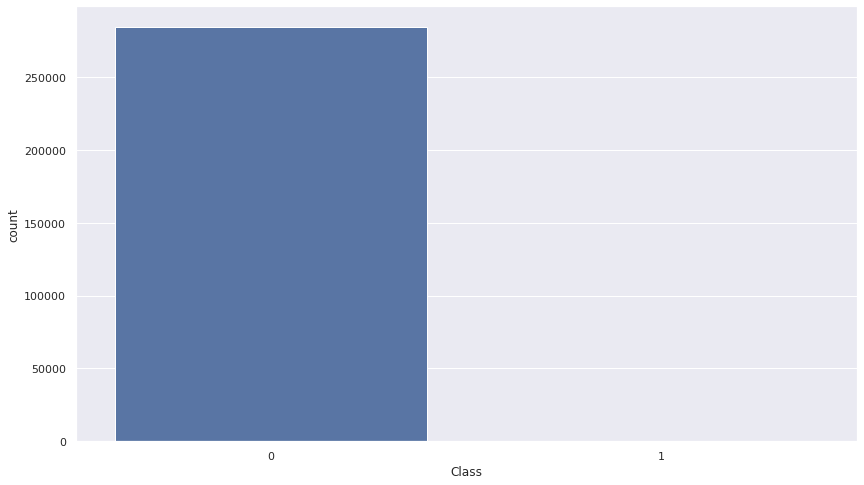

In [7]:
ax=sns.countplot(x=target,data=df)
print(df[target].value_counts())

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [9]:
def generate_model_report(y_actual,y_predicted):
    print('Accuracy=',accuracy_score(y_actual,y_predicted))
    print('precision=',precision_score(y_actual,y_predicted))
    print('Recall=',recall_score(y_actual,y_predicted))
    print('F1 score=',f1_score(y_actual,y_predicted))
    pass

In [10]:
def generate_auc_roc_curve(clf,x_test):
    y_pred_proba=clf.predict_proba(x_test)[:,1]
    fpr,tpr,threshold=roc_curve(ytest,y_pred_proba)
    auc=roc_auc_score(ytest,y_pred_proba)
    plt.plot(fpr,tpr,label="Auc Roc curve with area under the curve="+str(auc))
    plt.legend(loc=4)
    plt.show()
    pass

In [14]:
unique,count=np.unique(y_train,return_counts=True)
y_train_dict_count={k:v for (k,v) in zip(unique,count)}
y_train_dict_count

{0: 190477, 1: 343}

In [15]:
import imblearn
from imblearn.over_sampling import SMOTE

In [16]:
sm=SMOTE(random_state=12,sampling_strategy=1)
x_train_res,y_train_res=sm.fit_sample(x_train,y_train)

In [18]:
unique,count=np.unique(y_train_res,return_counts=True)
y_train_smote_count={k:v for (k,v) in zip(unique,count)}
y_train_smote_count

{0: 190477, 1: 190477}

In [19]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(max_iter=10000).fit(x_train_res,y_train_res)
y_test_pred=clf.predict(x_test)

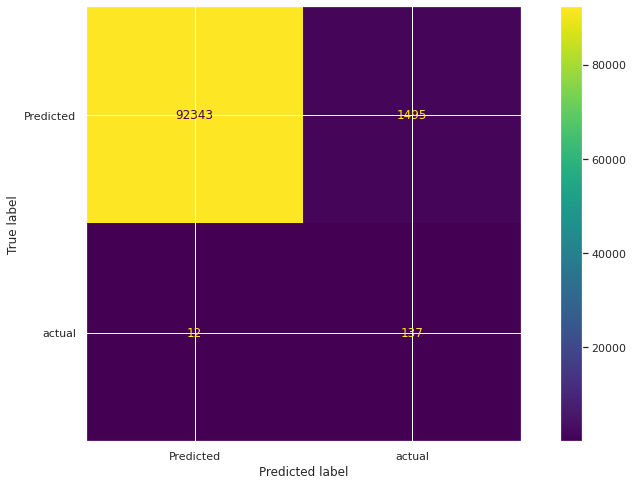

In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf,x_test,y_test,display_labels=["Predicted","actual"])

In [21]:
generate_model_report(y_test,y_test_pred)

Accuracy= 0.98396586761999
precision= 0.08394607843137254
Recall= 0.9194630872483222
F1 score= 0.15384615384615385


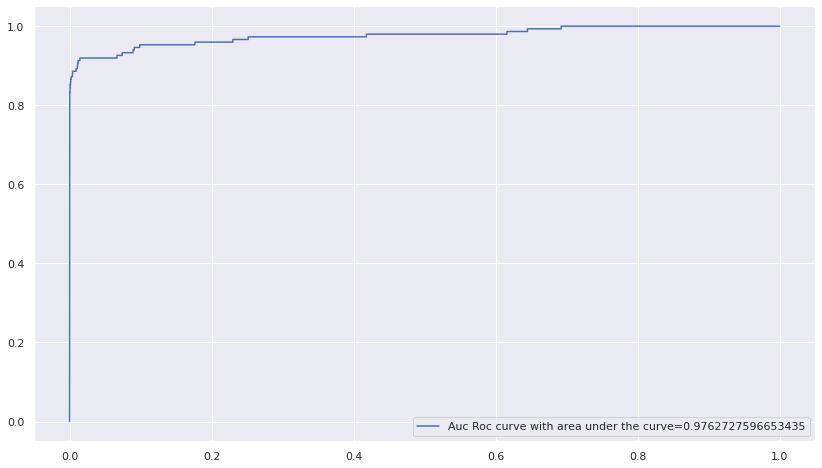

In [22]:
generate_auc_roc_curve(clf,x_test)

In [ ]:
#To improve the performance, now need to do Gridsearch

best parameters: {'smote__sampling_strategy': 0.005}


<AxesSubplot:xlabel='weight'>

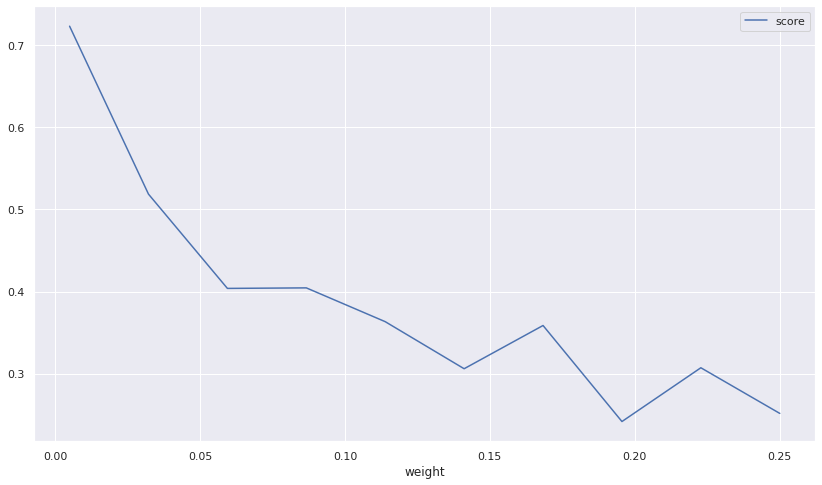

In [25]:
from imblearn.pipeline import make_pipeline
import numpy as np
from sklearn.model_selection import GridSearchCV

#Pipeline

pipe=make_pipeline(SMOTE(),LogisticRegression())

#Previously, sampling_strategy=1,and here now we artificially applying weights in range of 0.005 to 0.25

#it resulted 0.005 is the best value

weights=np.linspace(0.005,0.25,10)

gsc=GridSearchCV(estimator=pipe,
                 param_grid={'smote__sampling_strategy':weights},
                scoring='f1',cv=3)

grid_result=gsc.fit(x_train,y_train)

print("best parameters: %s"%grid_result.best_params_)
weight_f1_score_df=pd.DataFrame({'score':grid_result.cv_results_['mean_test_score'],
                             'weight':weights})

weight_f1_score_df.plot(x='weight')

In [26]:
SMOTE().get_params().keys()

dict_keys(['k_neighbors', 'n_jobs', 'random_state', 'sampling_strategy'])

In [27]:
pipe=make_pipeline(SMOTE(sampling_strategy=0.005),LogisticRegression())

pipe.fit(x_train,y_train)
y_test_pred=pipe.predict(x_test)

In [28]:
generate_model_report(y_test,y_test_pred)

Accuracy= 0.9987870662964027
precision= 0.5916230366492147
Recall= 0.7583892617449665
F1 score= 0.6647058823529413
